In [48]:
import csv
import sys
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.signal as sg
import pandas as pd;

In [49]:
mins = []
maxs = []
cwd = os.getcwd()
print(cwd)

C:\Users\jakeuribe\DhanviJake


In [50]:
def E(delta_W, I, x, y, mf, pm = "+"):
    c_1 = delta_W/(2*(2*I+1))
    c_2 = y * (delta_W/2)*(1+(4*mf)/(2*(2*I+1)))
    if pm == "+":
        return c_1 + c_2
    if pm == "-":
        return c_1 - c_2
def delta_E(delta_W, I, x, y, mf, mf_prime, pm = "+"):
    E = E(delta_W, I, x, y, mf, pm = pm)
    E_prime = E(delta_W, I, x, y, mf_prime, pm = pm)
    return (E - E_prime)
    

In [51]:
def data_as_array(folder, csv_num, scale = 1):
    with open(f'./Dataset{folder}/TEK000{csv_num}.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        data = {}
        for row in reader:
            row = list(row.values())
            k,v = row[0],row[1]
            data[k] = v
            time = np.array(list(data.keys()))
    time = np.array(list(data.keys()))
    y = np.array(list(data.values()))
    
    time = np.array(list(map(float, time)))
    y = np.array(list(map(float, y)))*scale

    return y, time

def convert_v_to_f(data, start, end):
    v_max = np.max(data)
    v_min = np.min(data)

    frequency = start + (((end-start)/(v_max-v_min))*data)

    return frequency
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax



In [52]:
y_1, t_1 = data_as_array(1,14,)
f_1, t_1 = data_as_array(1,13,)

y_2, t_2 = data_as_array(2,18,)
f_2, t_2 = data_as_array(2,17,)

y_3, t_3 = data_as_array(3, 20,)
f_3, t_3 = data_as_array(3, 19,)

y_4, t_4 = data_as_array(4, 22,)
f_4, t_4 = data_as_array(4, 21,)

y_5, t_5 = data_as_array(5, 24,)
f_5, t_5 = data_as_array(5, 23,)

#opposite order because swapped
y_6, t_6 = data_as_array(6, 25,)
f_6, t_6 = data_as_array(6, 26,)



f_1 = convert_v_to_f(f_1,1.0,0.5e6)
f_2 = convert_v_to_f(f_2,0.5e6, 1e6)
f_3 = convert_v_to_f(f_3,1e6, 1.5e6)
f_4 = convert_v_to_f(f_4,1.5e6, 2e6)
f_5 = convert_v_to_f(f_5,2e6, 2.5e6)
f_6 = convert_v_to_f(f_6,2.5e6, 3e6)



f = np.append(f_1,f_2)
f = np.append(f, f_3)
f = np.append(f, f_4)
f = np.append(f, f_5)
f = np.append(f, f_6)

y = np.append(y_1,y_2)
y = np.append(y,y_3)
y = np.append(y,y_4)
y = np.append(y,y_5)
y = np.append(y,y_6)
#plt.plot(t1,abs(y1),)

In [ ]:
list1, list2 = zip(*sorted(zip(f, -1*y)))
lyIndex = sg.find_peaks(list2, width = 40)
lyIndex = lyIndex[0]
#indexlist = np.array[list(lyIndex)]
peakF = np.array(list1)[list(lyIndex)]
peakI = np.array(list2)[list(lyIndex)]
peak_df = pd.DataFrame(list(zip(peakF,peakI)),columns = ['Frequency',"Intensity"])

plt.figure(figsize=(10,6))
plt.scatter(f,y*-1, s = 3)
plt.scatter(peakF,peakI, c = "Red", s =200, marker = '*')

plt.legend(["Measured Data Points","Peaks found using\n scipy.signal.find_peaks"]) 
plt.xlabel("$f$\t$Hz$")
plt.ylabel("measured intensity (volts)")
plt.title("Several scans stitched together, normalized for fequency\n$\Delta f = 1Hz - 3MHz$\n $I_{HC} = 0.06A$ $V_{input} = 0.2A$")
plt.savefig("labphotos\\slow_scan.png",dpi = 800)

In [42]:
y_7, t_7 = data_as_array(7, 28, scale = 0.5e6)
f_7, t_7 = data_as_array(7, 27,)
f_7 = convert_v_to_f(f_7, 0.1e6, 2.94e6)


list1, list2 = zip(*sorted(zip(f_7, -1*y_7)))
lyIndex = sg.find_peaks(list2, width = 20)
lyIndex = lyIndex[0]
#indexlist = np.array[list(lyIndex)]
peakF = np.array(list1)[list(lyIndex)]
peakI = np.array(list2)[list(lyIndex)]

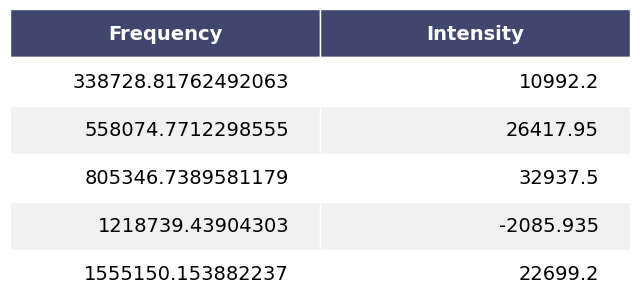

In [38]:
peakFArranged = peakF[...,None]
peak_df = pd.DataFrame(list(zip(peakF,peakI)),columns = ['Frequency',"Intensity"])
fig,ax = render_mpl_table(peak_df, header_columns=0, col_width=4.0)

fig.savefig("labphotos\\tablePeak2.png")

Text(0.5, 1.0, 'Wide Range Optical Pumping Scan\n $\\Delta$f = $0.01MHz-2.94MHz$ \n$I_{HC}$ = $0.07 A$\t $V_{input} = 0.3V$')

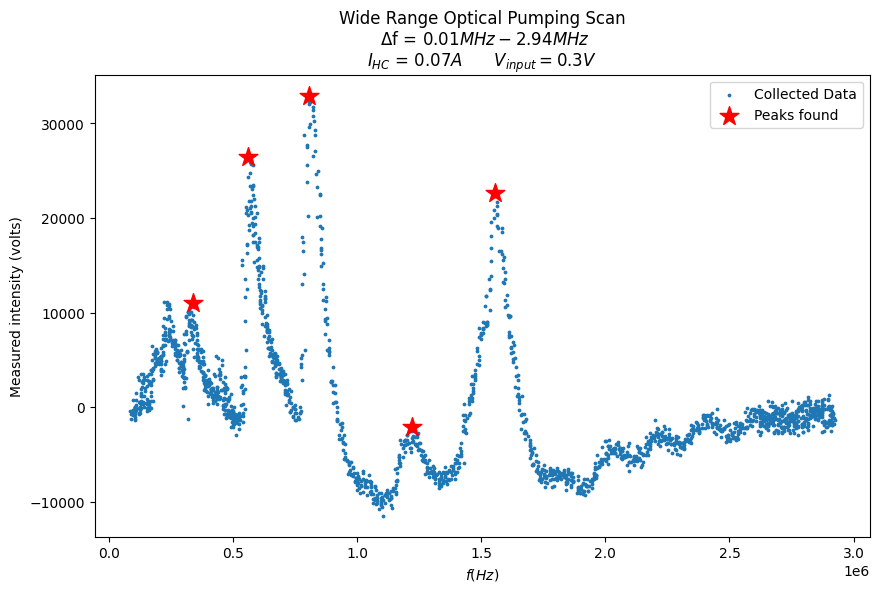

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(f_7,-1*y_7, s = 3)
plt.scatter(peakF,peakI, c = "Red", s =200, marker = '*')
plt.legend(["Collected Data","Peaks found"]) 
plt.xlabel("$f (Hz)$")
plt.ylabel("Measured intensity (volts)")
plt.title("Wide Range Optical Pumping Scan\n $\Delta$f = $0.01MHz-2.94MHz$ \n$I_{HC}$ = $0.07 A$\t $V_{input} = 0.3V$")
#plt.savefig("labphotos\\wideFrequency1.png", dpi = 800)

In [ ]:
peakFArranged = peakF[...,None]
peak_df = pd.DataFrame(list(zip(peakF,peakI)),columns = ['Frequency',"Intensity"])
fig,ax = render_mpl_table(peak_df, header_columns=0, col_width=4.0)

fig.savefig("labphotos\\tablePeak1.png")